In [1]:
import tensorflow as tf 
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
for image_batch, label_batch in  dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 0 1 1 1 0 0 1 0 0 1 2 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0]


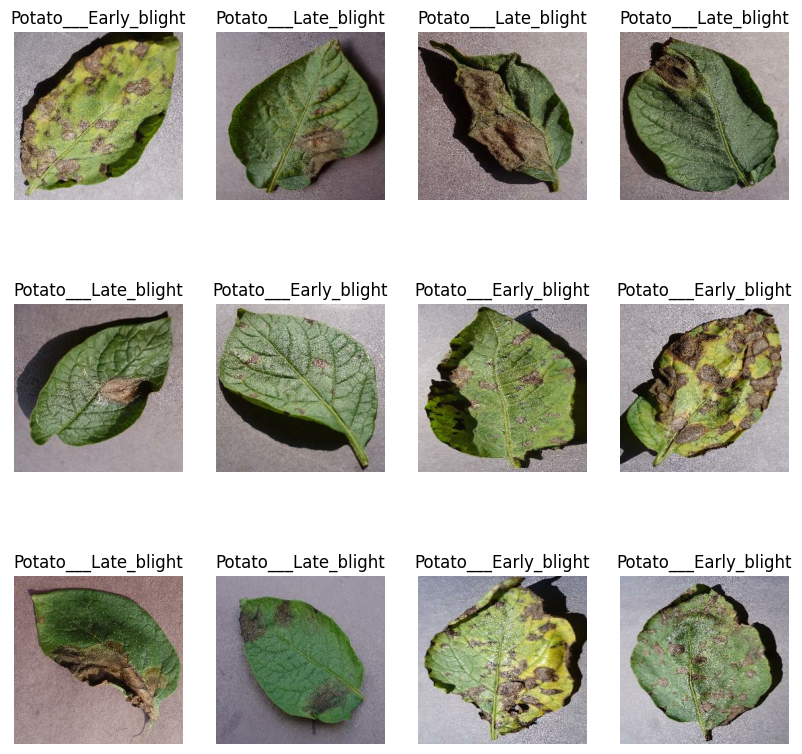

In [59]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in  dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [7]:
len(dataset)

68

In [ ]:
80% ==> training
20% ==> 10% validation, 10% test

In [9]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [10]:
train_ds = dataset.take(54)
len(train_ds)

54

In [34]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [35]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [36]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [37]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [43]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds
    return 


In [44]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [45]:
len(train_ds)

54

In [46]:
len(val_ds)

6

In [47]:
len(test_ds)

8

In [48]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [51]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [52]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [53]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [54]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [56]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [57]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
54/54 [==============================] - 67s 1s/step - loss: 0.8883 - accuracy: 0.4716 - val_loss: 0.7759 - val_accuracy: 0.6615
Epoch 2/50
54/54 [==============================] - 58s 1s/step - loss: 0.6816 - accuracy: 0.6840 - val_loss: 0.7136 - val_accuracy: 0.7135
Epoch 3/50
54/54 [==============================] - 57s 1s/step - loss: 0.5043 - accuracy: 0.7795 - val_loss: 0.3601 - val_accuracy: 0.8333
Epoch 4/50
54/54 [==============================] - 57s 1s/step - loss: 0.3406 - accuracy: 0.8704 - val_loss: 0.4523 - val_accuracy: 0.8438
Epoch 5/50
54/54 [==============================] - 57s 1s/step - loss: 0.2622 - accuracy: 0.8912 - val_loss: 0.1991 - val_accuracy: 0.9167
Epoch 6/50
54/54 [==============================] - 57s 1s/step - loss: 0.2152 - accuracy: 0.9167 - val_loss: 0.2633 - val_accuracy: 0.8854
Epoch 7/50
54/54 [==============================] - 59s 1s/step - loss: 0.1679 - accuracy: 0.9421 - val_loss: 0.3370 - val_accuracy: 0.8438
Epoch 8/50
54/54 [==

In [61]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 6s 225ms/step - loss: 1.2471e-05 - accuracy: 1.0000


In [62]:
scores

[1.2471329682739452e-05, 1.0]

In [63]:
history

In [64]:
history.params


{'verbose': 1, 'epochs': 50, 'steps': 54}

In [65]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [67]:
history.history['loss']

[0.8883399963378906,
 0.6816233992576599,
 0.5042507648468018,
 0.34062010049819946,
 0.2621704339981079,
 0.21523433923721313,
 0.16789695620536804,
 0.18948602676391602,
 0.07094849646091461,
 0.12015233933925629,
 0.05526595562696457,
 0.0643526166677475,
 0.04007521644234657,
 0.051130201667547226,
 0.024352729320526123,
 0.08049283176660538,
 0.02530754543840885,
 0.005052614025771618,
 0.0028217886574566364,
 0.0007164711714722216,
 0.00041380978655070066,
 0.00024678916088305414,
 0.00020537525415420532,
 0.00016615670756436884,
 0.00014574181113857776,
 0.00012249423889443278,
 0.00010249069600831717,
 8.949992479756474e-05,
 8.159675780916587e-05,
 7.06853752490133e-05,
 6.412927177734673e-05,
 5.765040987171233e-05,
 4.886802707915194e-05,
 4.427143721841276e-05,
 4.1141258407151327e-05,
 3.7793386582052335e-05,
 3.151291093672626e-05,
 2.8658423616434447e-05,
 2.6565347070572898e-05,
 2.3348025933955796e-05,
 2.2162772438605316e-05,
 1.948734643519856e-05,
 1.806491491151973

In [66]:
len(history.history['loss'])

50

In [68]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.8883399963378906,
 0.6816233992576599,
 0.5042507648468018,
 0.34062010049819946,
 0.2621704339981079]

In [69]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

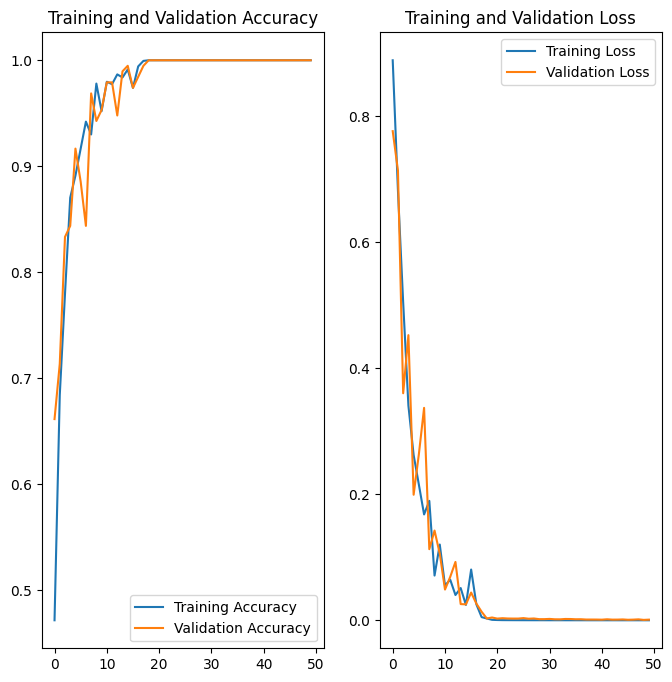

In [70]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

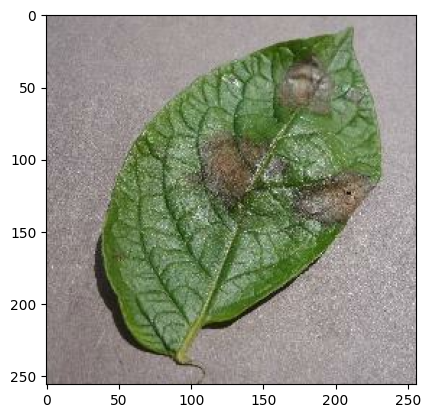

In [75]:
for images_batch, labels_batch in test_ds.take(1):
    plt.imshow(images_batch[0].numpy().astype('uint8'))

In [76]:
for images_batch, labels_batch in test_ds.take(1):
    print(images_batch[0].numpy().astype('uint8'))

[[[167 162 168]
  [157 152 158]
  [156 151 157]
  ...
  [196 193 200]
  [199 196 203]
  [200 197 204]]

 [[177 172 178]
  [166 161 167]
  [161 156 162]
  ...
  [187 184 191]
  [184 181 188]
  [175 172 179]]

 [[180 175 181]
  [170 165 171]
  [165 160 166]
  ...
  [193 190 197]
  [194 191 198]
  [183 180 187]]

 ...

 [[140 137 148]
  [163 160 171]
  [162 159 170]
  ...
  [153 151 164]
  [152 150 163]
  [170 168 181]]

 [[120 117 128]
  [146 143 154]
  [144 141 152]
  ...
  [167 165 178]
  [152 150 163]
  [136 134 147]]

 [[138 135 146]
  [154 151 162]
  [144 141 152]
  ...
  [148 146 159]
  [143 141 154]
  [151 149 162]]]


first image to predict
first image's actual label: Potato___Late_blight
1/1 [==============================] - 0s 243ms/step
predicted label: Potato___Late_blight


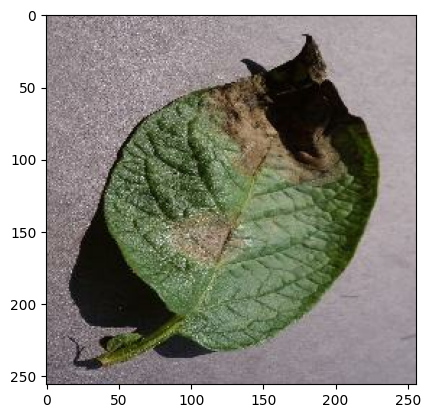

In [83]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = (images_batch[0].numpy().astype('uint8'))
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label:",class_names[first_label])
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [85]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)#Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 34ms/step


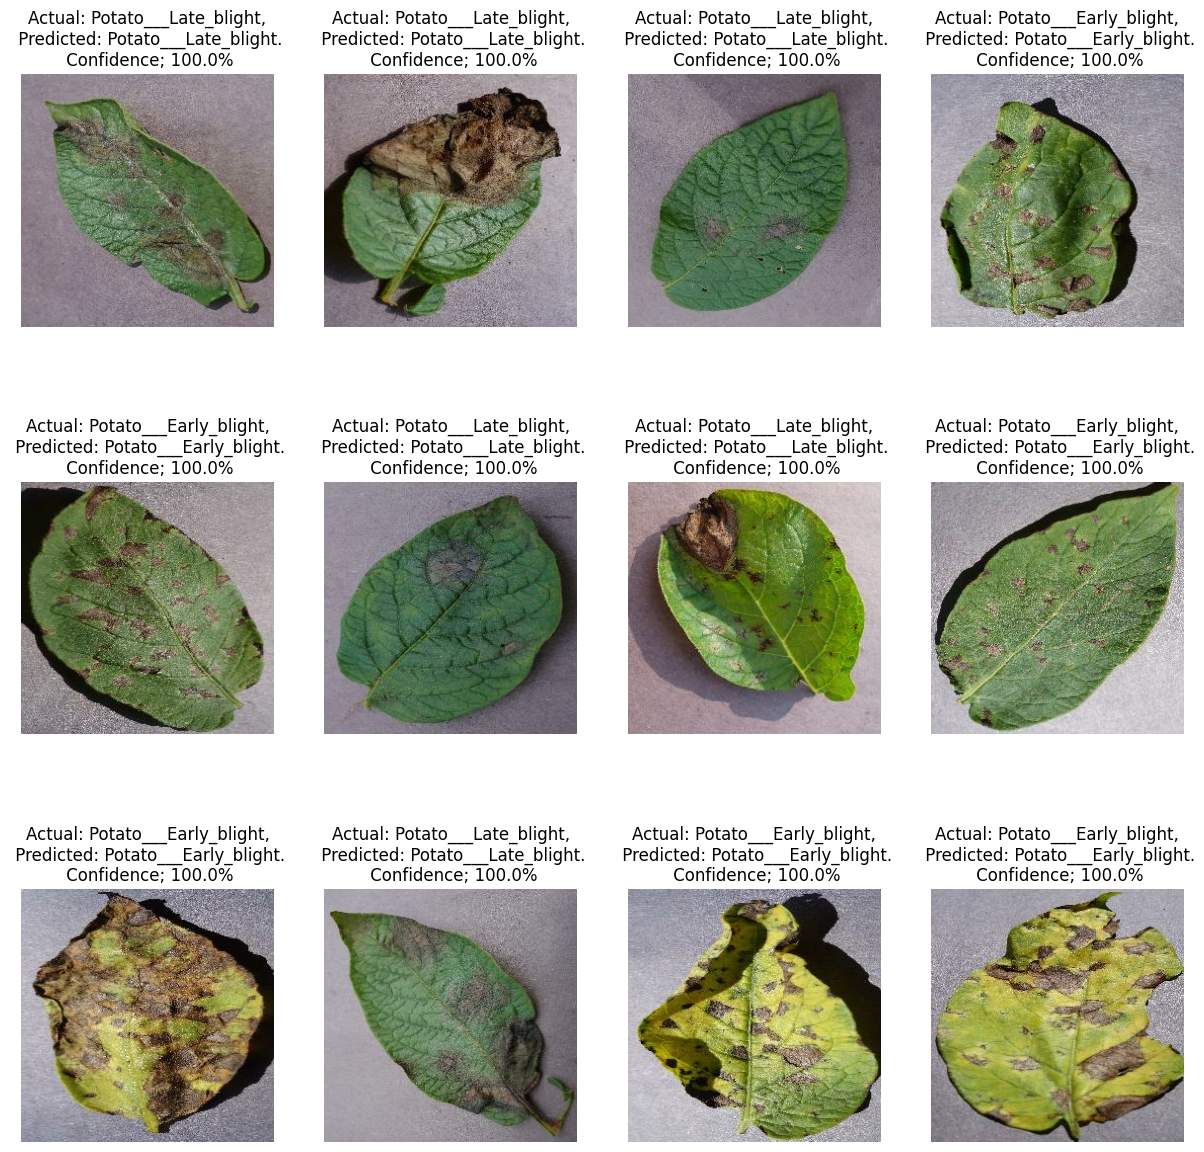

In [91]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence; {confidence}%")

        plt.axis("off")

In [95]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets
